In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

In [2]:
# load data
import pandas as pd
flights  = pd.read_csv("flights.csv", low_memory=False)
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")

print(f"Flights dataset shape:   {flights.shape}")
print(f"Airlines dataset shape:  {airlines.shape}")
print(f"Airports dataset shape:  {airports.shape}")



Flights dataset shape:   (5819079, 31)
Airlines dataset shape:  (14, 2)
Airports dataset shape:  (322, 7)


In [3]:
import pandas as pd

# Load flights.csv into df (same as Kaggle code)
df = pd.read_csv("flights.csv", low_memory=False)

print(f"Dataset shape: {df.shape}")
print(df.info())
print(df.head())


Dataset shape: (5819079, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIV

In [4]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [5]:
# Missing values analysis
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Analysis:
                 Column  Missing_Count  Missing_Percentage
25  CANCELLATION_REASON        5729195           98.455357
30        WEATHER_DELAY        4755640           81.724960
29  LATE_AIRCRAFT_DELAY        4755640           81.724960
28        AIRLINE_DELAY        4755640           81.724960
27       SECURITY_DELAY        4755640           81.724960
26     AIR_SYSTEM_DELAY        4755640           81.724960
16             AIR_TIME         105071            1.805629
22        ARRIVAL_DELAY         105071            1.805629
15         ELAPSED_TIME         105071            1.805629
18            WHEELS_ON          92513            1.589822
19              TAXI_IN          92513            1.589822
21         ARRIVAL_TIME          92513            1.589822
12             TAXI_OUT          89047            1.530259
13           WHEELS_OFF          89047            1.530259
11      DEPARTURE_DELAY          86153            1.480526
10       DEPARTURE_TIME        

In [6]:
print(df.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

In [7]:
# Create date column
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Basic flight statistics
total_flights = len(df)
cancelled_flights = df['CANCELLED'].sum()
diverted_flights = df['DIVERTED'].sum()
on_time_flights = len(df[(df['DEPARTURE_DELAY'] <= 0) & (df['CANCELLED'] == 0)])

print(f"Total Flights: {total_flights:,}")
print(f"Cancelled Flights: {cancelled_flights:,} ({cancelled_flights/total_flights*100:.2f}%)")
print(f"Diverted Flights: {diverted_flights:,} ({diverted_flights/total_flights*100:.2f}%)")
print(f"On-time Flights: {on_time_flights:,} ({on_time_flights/total_flights*100:.2f}%)")

Total Flights: 5,819,079
Cancelled Flights: 89,884 (1.54%)
Diverted Flights: 15,187 (0.26%)
On-time Flights: 3,606,117 (61.97%)


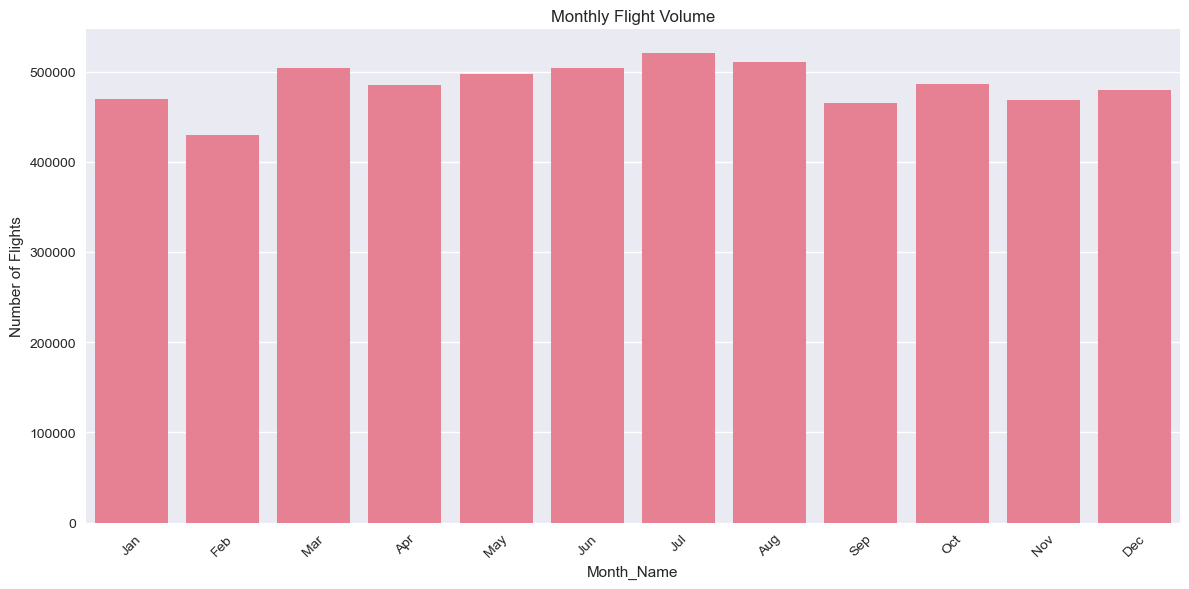

In [8]:
# Monthly flight volume
monthly_flights = df.groupby('MONTH').size().reset_index(name='Flight_Count')
monthly_flights['Month_Name'] = monthly_flights['MONTH'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_flights, x='Month_Name', y='Flight_Count')
plt.title('Monthly Flight Volume')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

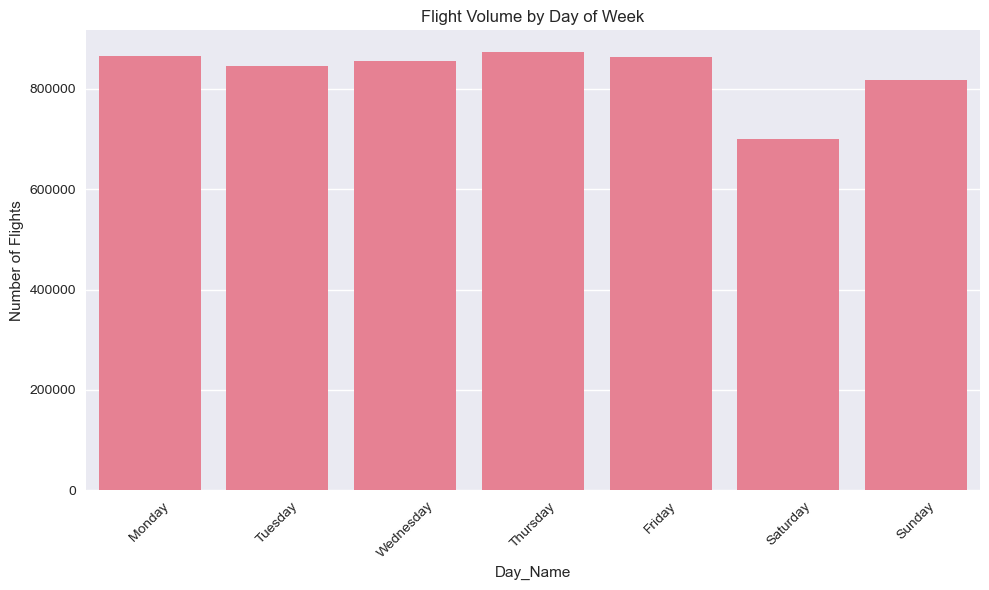

In [9]:
# Day of week analysis
dow_flights = df.groupby('DAY_OF_WEEK').size().reset_index(name='Flight_Count')
dow_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
             5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
dow_flights['Day_Name'] = dow_flights['DAY_OF_WEEK'].map(dow_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=dow_flights, x='Day_Name', y='Flight_Count')
plt.title('Flight Volume by Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Top airlines by flight volume
airline_stats = df.groupby('AIRLINE').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'CANCELLED': 'sum',
    'DIVERTED': 'sum'
}).round(2)

airline_stats.columns = ['Total_Flights', 'Avg_Departure_Delay', 'Avg_Arrival_Delay', 
                        'Cancelled_Flights', 'Diverted_Flights']
airline_stats = airline_stats.sort_values('Total_Flights', ascending=False)

print("🏢 Top 10 Airlines by Flight Volume:")
print(airline_stats.head(10))

🏢 Top 10 Airlines by Flight Volume:
         Total_Flights  Avg_Departure_Delay  Avg_Arrival_Delay  \
AIRLINE                                                          
WN             1261855                10.58               4.37   
DL              875881                 7.37               0.19   
AA              725984                 8.90               3.45   
OO              588353                 7.80               5.85   
EV              571977                 8.72               6.59   
UA              515723                14.44               5.43   
MQ              294632                10.13               6.46   
B6              267048                11.51               6.68   
US              198715                 6.14               3.71   
AS              172521                 1.79              -0.98   

         Cancelled_Flights  Diverted_Flights  
AIRLINE                                       
WN                   16043              3409  
DL                    3824    

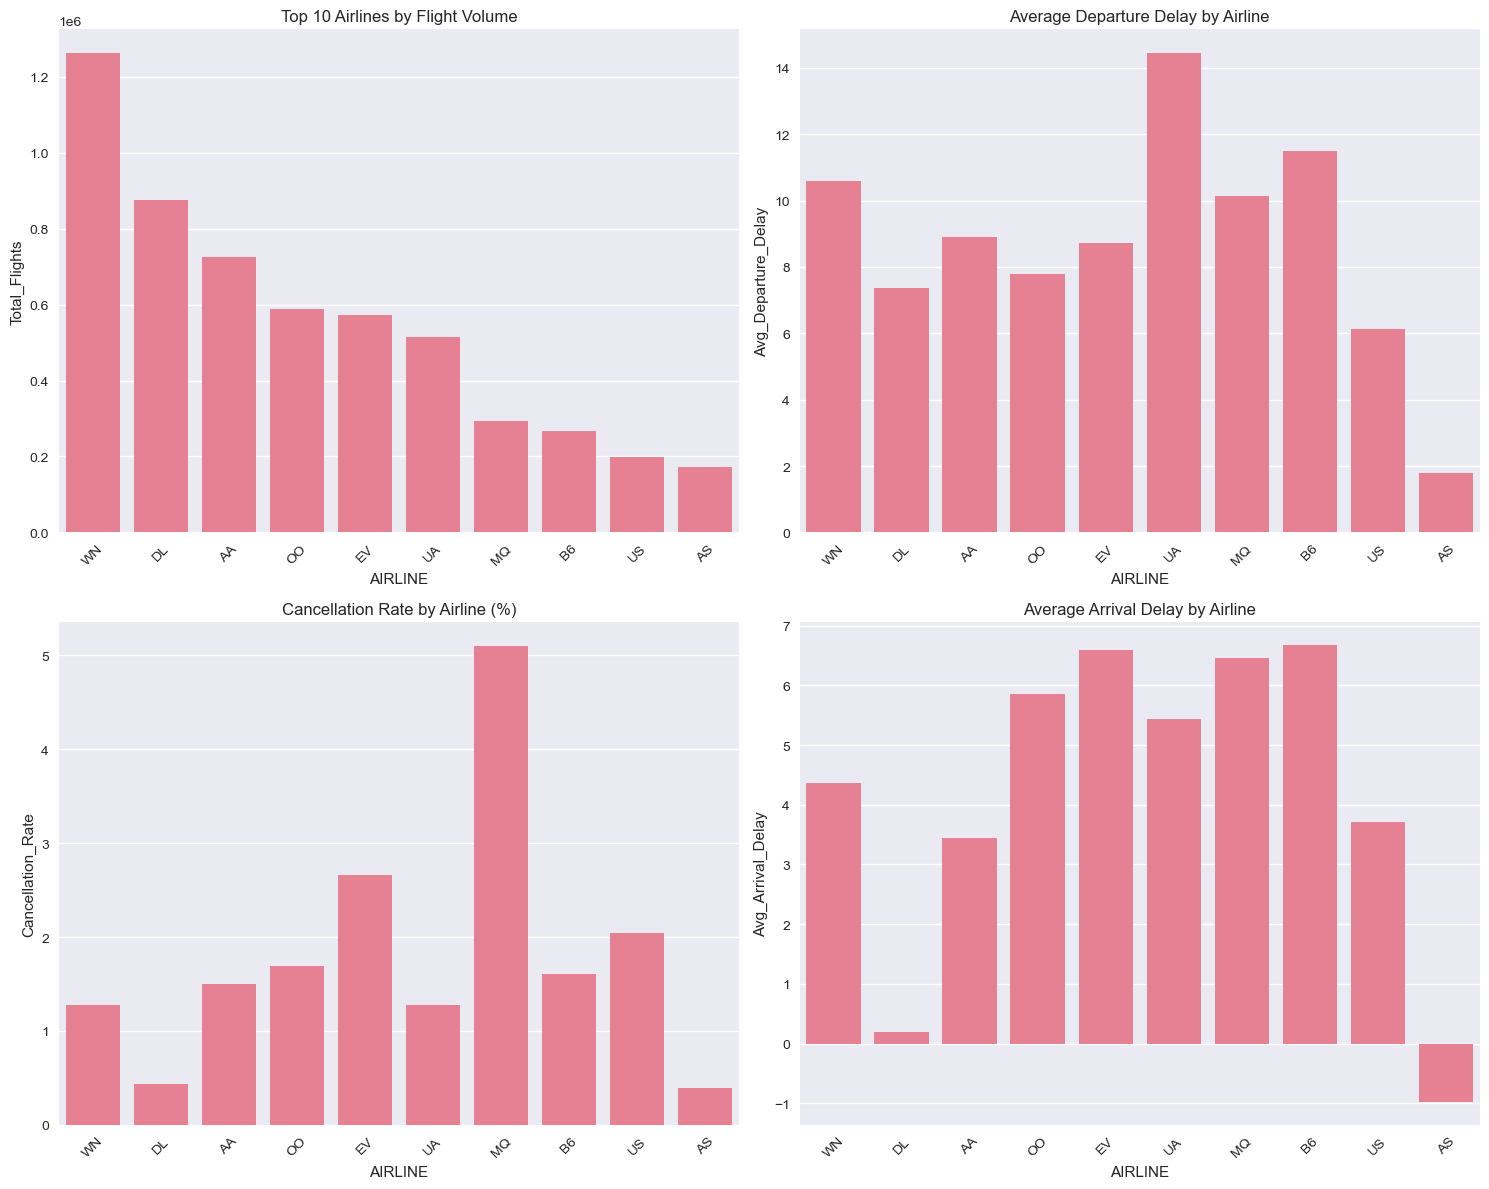

In [11]:
#Airline performance visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Flight volume
top_airlines = airline_stats.head(10)
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Total_Flights', ax=axes[0,0])
axes[0,0].set_title('Top 10 Airlines by Flight Volume')
axes[0,0].tick_params(axis='x', rotation=45)

# Average departure delay
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Avg_Departure_Delay', ax=axes[0,1])
axes[0,1].set_title('Average Departure Delay by Airline')
axes[0,1].tick_params(axis='x', rotation=45)

# Cancellation rate
top_airlines['Cancellation_Rate'] = (top_airlines['Cancelled_Flights'] / top_airlines['Total_Flights']) * 100
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Cancellation_Rate', ax=axes[1,0])
axes[1,0].set_title('Cancellation Rate by Airline (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Average arrival delay
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Avg_Arrival_Delay', ax=axes[1,1])
axes[1,1].set_title('Average Arrival Delay by Airline')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

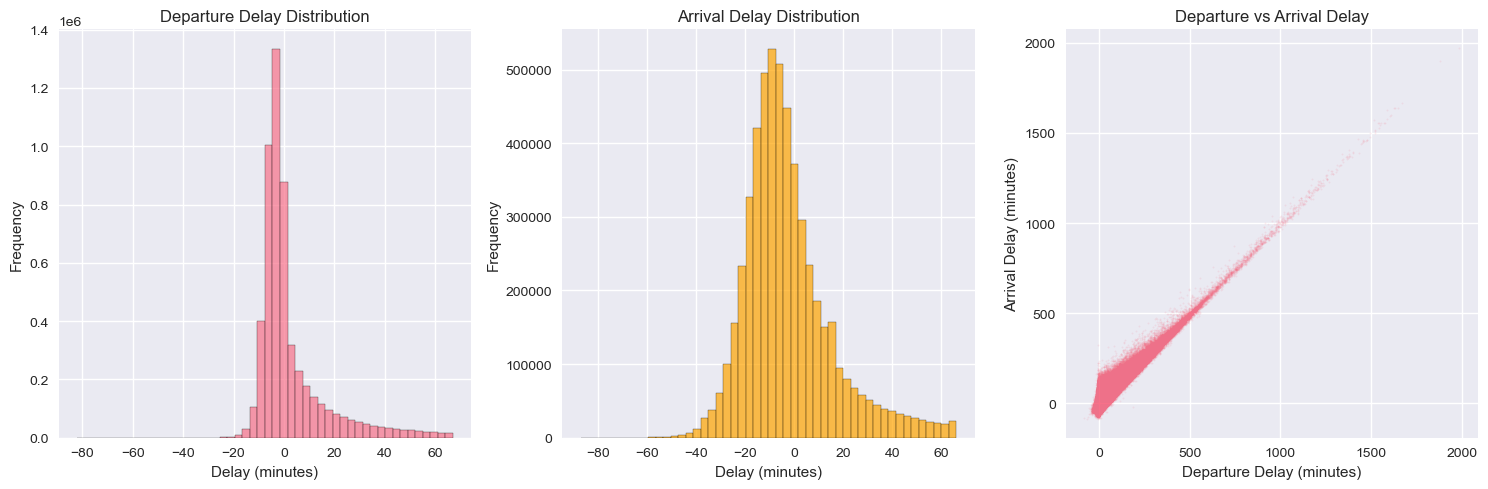

In [12]:
# Filter out cancelled flights for delay analysis
active_flights = df[df['CANCELLED'] == 0].copy()

# Departure delay distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Remove extreme outliers for better visualization
delay_percentile = np.percentile(active_flights['DEPARTURE_DELAY'].dropna(), 95)
delay_data = active_flights[active_flights['DEPARTURE_DELAY'] <= delay_percentile]['DEPARTURE_DELAY']
plt.hist(delay_data, bins=50, alpha=0.7, edgecolor='black')
plt.title('Departure Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
arrival_delay_percentile = np.percentile(active_flights['ARRIVAL_DELAY'].dropna(), 95)
arrival_delay_data = active_flights[active_flights['ARRIVAL_DELAY'] <= arrival_delay_percentile]['ARRIVAL_DELAY']
plt.hist(arrival_delay_data, bins=50, alpha=0.7, edgecolor='black', color='orange')
plt.title('Arrival Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(active_flights['DEPARTURE_DELAY'], active_flights['ARRIVAL_DELAY'], 
           alpha=0.1, s=1)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

plt.tight_layout()
plt.show()

In [13]:
# Delay statistics
print("📊 Delay Statistics:")
delay_stats = active_flights[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].describe()
print(delay_stats)

📊 Delay Statistics:
       DEPARTURE_DELAY  ARRIVAL_DELAY
count     5.729195e+06   5.714008e+06
mean      9.338837e+00   4.407057e+00
std       3.699246e+01   3.927130e+01
min      -8.200000e+01  -8.700000e+01
25%      -5.000000e+00  -1.300000e+01
50%      -2.000000e+00  -5.000000e+00
75%       7.000000e+00   8.000000e+00
max       1.988000e+03   1.971000e+03


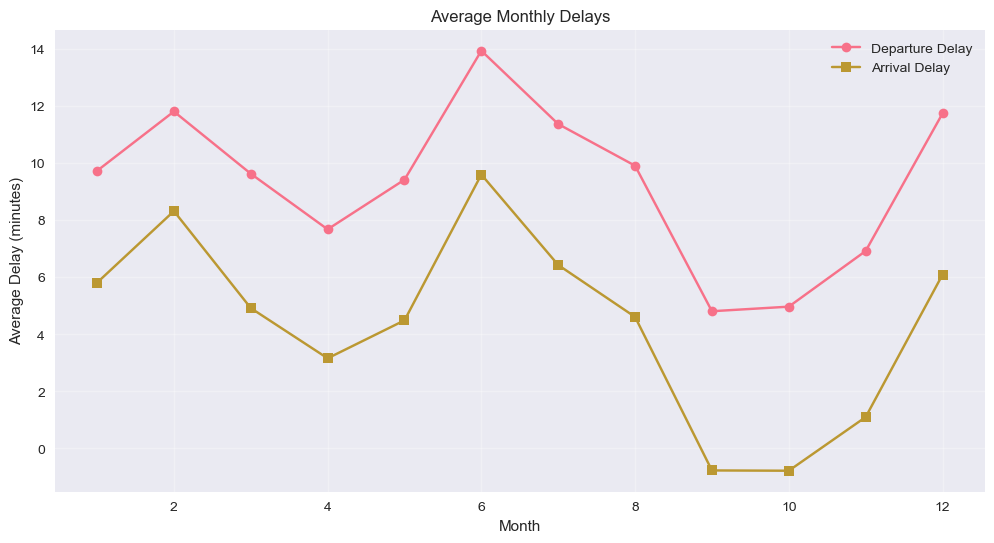

In [14]:
# Delay by month
monthly_delays = active_flights.groupby('MONTH').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean'
}).round(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_delays.index, monthly_delays['DEPARTURE_DELAY'], 
         marker='o', label='Departure Delay')
plt.plot(monthly_delays.index, monthly_delays['ARRIVAL_DELAY'], 
         marker='s', label='Arrival Delay')
plt.title('Average Monthly Delays')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

🛣️  Top 15 Most Popular Routes:
ROUTE
SFOLAX    13744
LAXSFO    13457
JFKLAX    12016
LAXJFK    12015
LASLAX     9715
LGAORD     9639
LAXLAS     9594
ORDLGA     9575
SFOJFK     8440
JFKSFO     8437
OGGHNL     8313
HNLOGG     8282
LAXORD     8256
ATLLGA     8234
LGAATL     8215
Name: count, dtype: int64


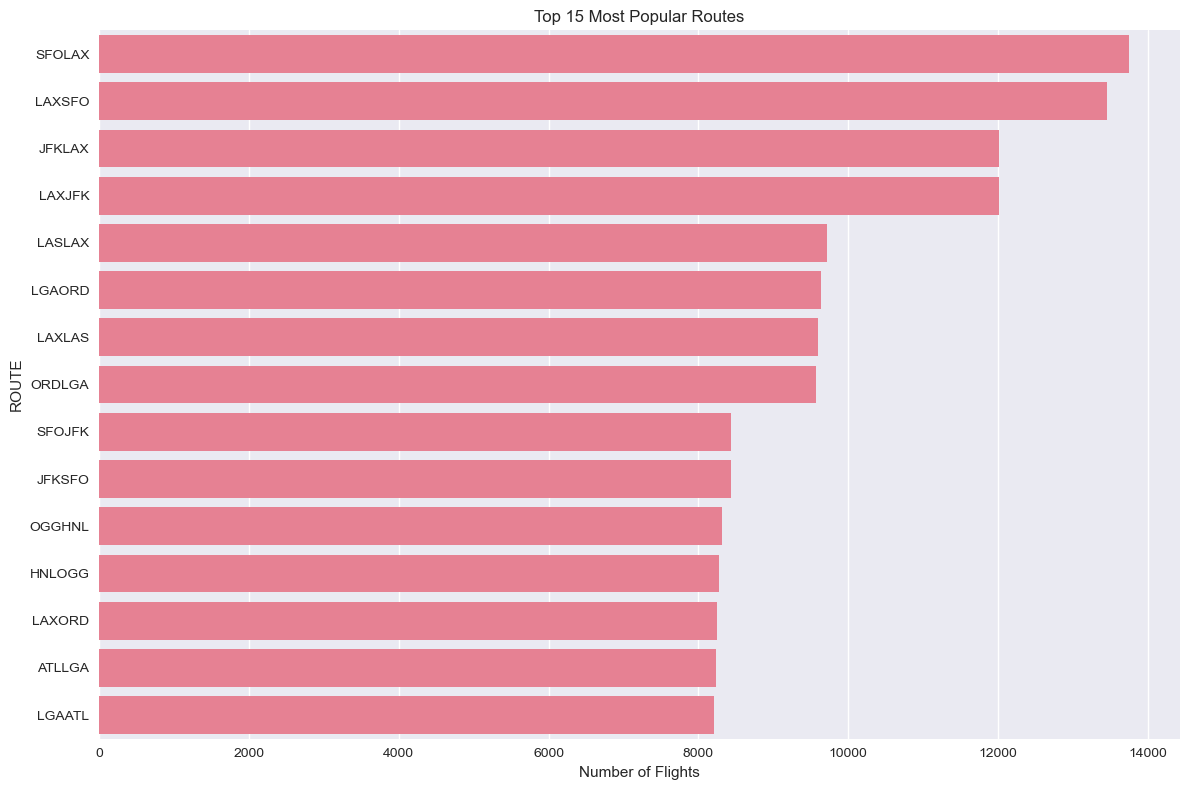

In [15]:
# Create route column
df['ROUTE'] = df['ORIGIN_AIRPORT']  + df['DESTINATION_AIRPORT']

# Most popular routes
popular_routes = df['ROUTE'].value_counts().head(15)
print("🛣️  Top 15 Most Popular Routes:")
print(popular_routes)

plt.figure(figsize=(12, 8))
sns.barplot(x=popular_routes.values, y=popular_routes.index)
plt.title('Top 15 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.tight_layout()
plt.show()

In [16]:
# Busiest airports
print("\n🏢 Busiest Origin Airports:")
busiest_origins = df['ORIGIN_AIRPORT'].value_counts().head(10)
print(busiest_origins)
print("\n🏢 Busiest Destination Airports:")
busiest_destinations = df['DESTINATION_AIRPORT'].value_counts().head(10)
print(busiest_destinations)


🏢 Busiest Origin Airports:
ORIGIN_AIRPORT
ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
Name: count, dtype: int64

🏢 Busiest Destination Airports:
DESTINATION_AIRPORT
ATL    346904
ORD    285906
DFW    239582
DEN    196010
LAX    194696
SFO    147966
PHX    146812
IAH    146683
LAS    133198
MSP    112128
Name: count, dtype: int64


In [17]:
# Airport performance
airport_performance = active_flights.groupby('ORIGIN_AIRPORT').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'DISTANCE': 'mean'
}).round(2)
airport_performance.columns = ['Total_Flights', 'Avg_Departure_Delay', 'Avg_Distance']
airport_performance = airport_performance.sort_values('Total_Flights', ascending=False)

print("\n🏢 Top 10 Airport Performance:")
print(airport_performance.head(10))


🏢 Top 10 Airport Performance:
                Total_Flights  Avg_Departure_Delay  Avg_Distance
ORIGIN_AIRPORT                                                  
ATL                    344279                 9.33        640.29
ORD                    277336                14.07        722.45
DFW                    233297                11.44        787.67
DEN                    193932                11.81        876.69
LAX                    192509                10.65       1252.54
PHX                    145913                 8.65        967.19
SFO                    145860                11.17       1201.66
IAH                    144492                11.52        826.25
LAS                    132245                10.94        997.37
MSP                    111309                 7.24        810.71


In [18]:
# Distance analysis
print("Distance Statistics:")
print(df['DISTANCE'].describe())

Distance Statistics:
count    5.819079e+06
mean     8.223565e+02
std      6.077843e+02
min      2.100000e+01
25%      3.730000e+02
50%      6.470000e+02
75%      1.062000e+03
max      4.983000e+03
Name: DISTANCE, dtype: float64


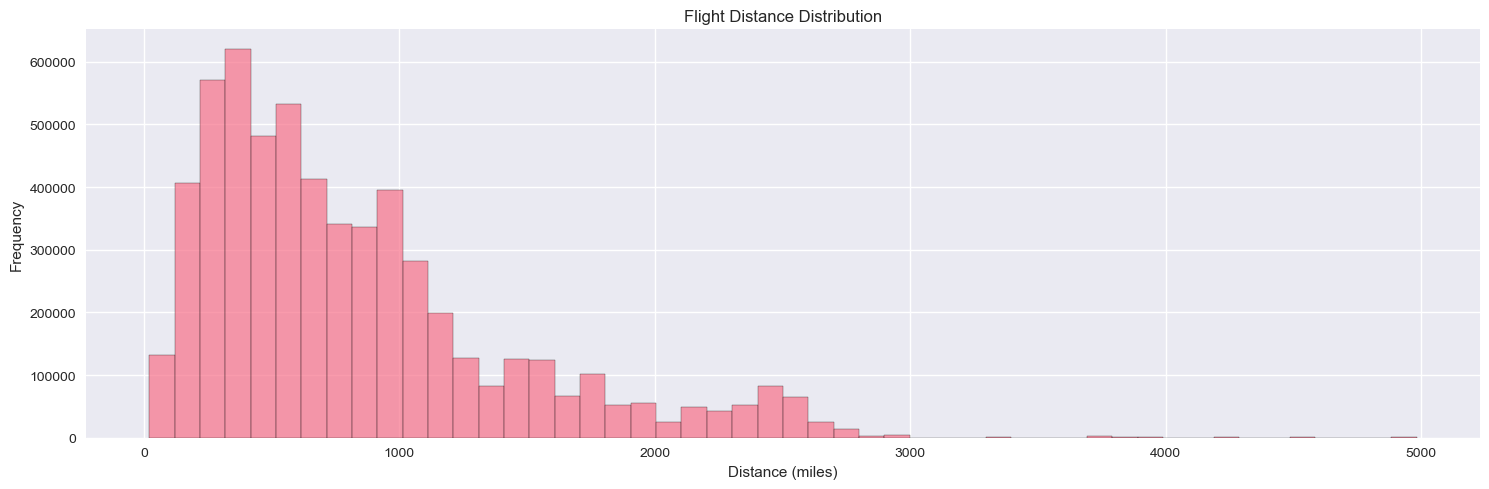

In [19]:
# Distance 
plt.figure(figsize=(15, 5))
plt.hist(df['DISTANCE'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Flight Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

🕐 Delay Causes Analysis:
       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
count     950873.000000   950873.000000  950873.000000        950873.000000   
mean          11.977555        0.085162      21.177720            26.251593   
std           28.777464        2.266605      50.467607            44.876877   
min            0.000000        0.000000       0.000000             0.000000   
25%            0.000000        0.000000       0.000000             0.000000   
50%            0.000000        0.000000       5.000000             9.000000   
75%           13.000000        0.000000      21.000000            33.000000   
max         1134.000000      573.000000    1971.000000          1331.000000   

       WEATHER_DELAY  
count  950873.000000  
mean        3.245295  
std        21.575930  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max      1211.000000  

📊 Average Delay by Cause:
LATE_AIRCRAFT_DELAY    26.251

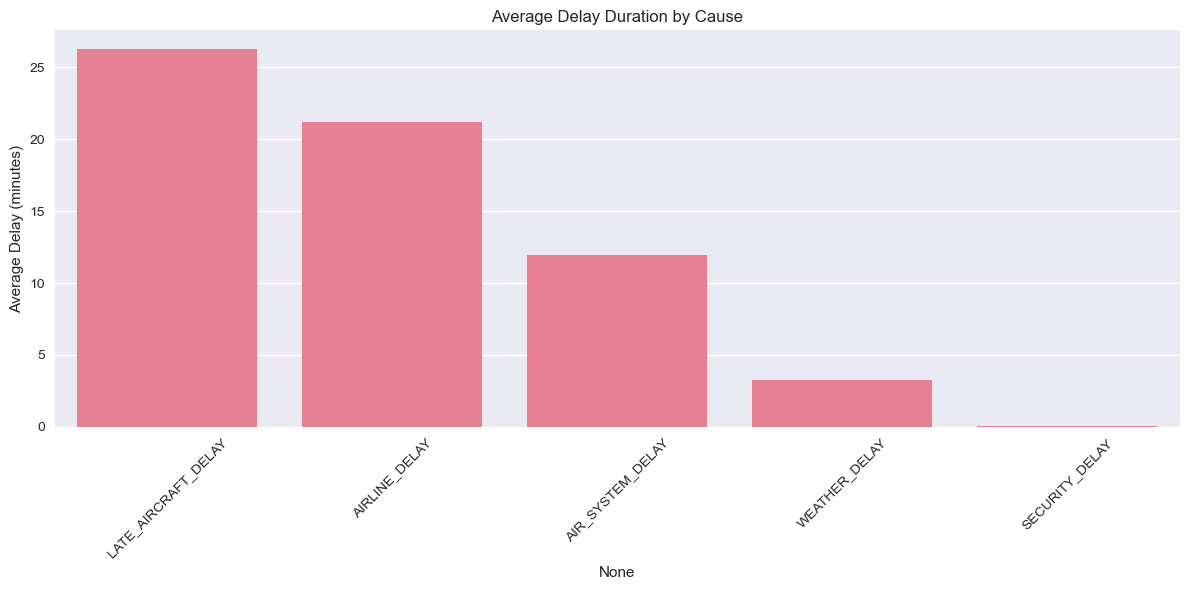

In [20]:
# Analyze delay causes (only for flights with delays)
delay_causes = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

delayed_flights = active_flights[active_flights['DEPARTURE_DELAY'] > 0]

print("🕐 Delay Causes Analysis:")
cause_stats = delayed_flights[delay_causes].describe()
print(cause_stats)

# Average delay by cause
avg_delays_by_cause = delayed_flights[delay_causes].mean().sort_values(ascending=False)
print("\n📊 Average Delay by Cause:")
print(avg_delays_by_cause)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delays_by_cause.index, y=avg_delays_by_cause.values)
plt.title('Average Delay Duration by Cause')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

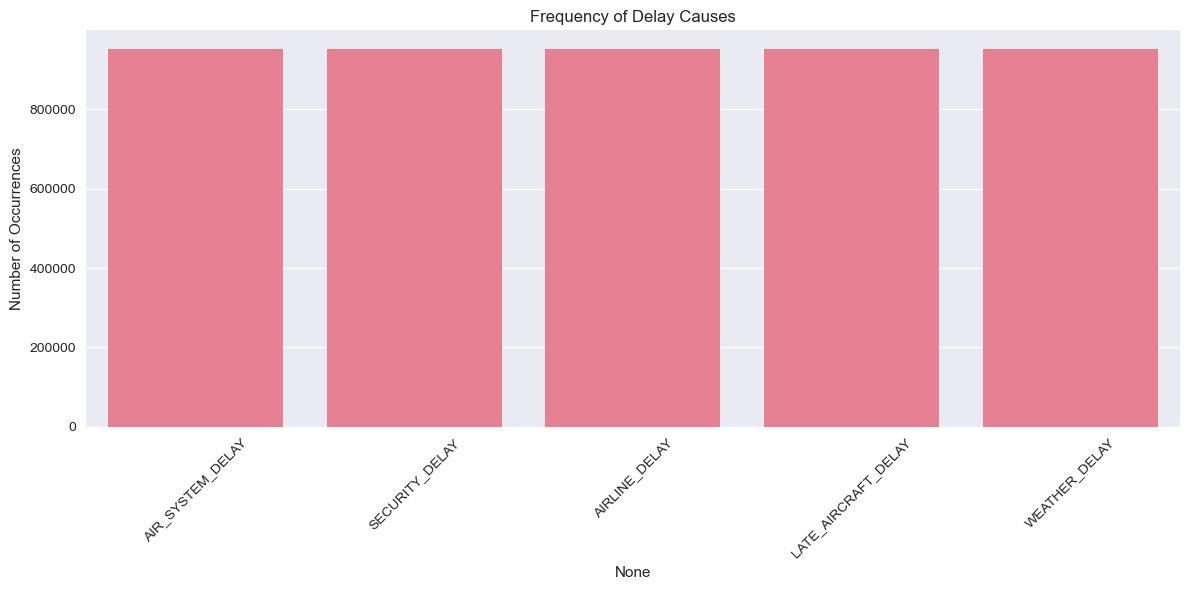

In [21]:
# Delay cause frequency
cause_frequency = delayed_flights[delay_causes].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_frequency.index, y=cause_frequency.values)
plt.title('Frequency of Delay Causes')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

❌ Total Cancelled Flights: 89,884

📋 Cancellation Reasons:
CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

🏢 Top 10 Airlines by Cancellations:
AIRLINE
WN    16043
EV    15231
MQ    15025
AA    10919
OO     9960
UA     6573
B6     4276
US     4067
DL     3824
NK     2004
dtype: int64


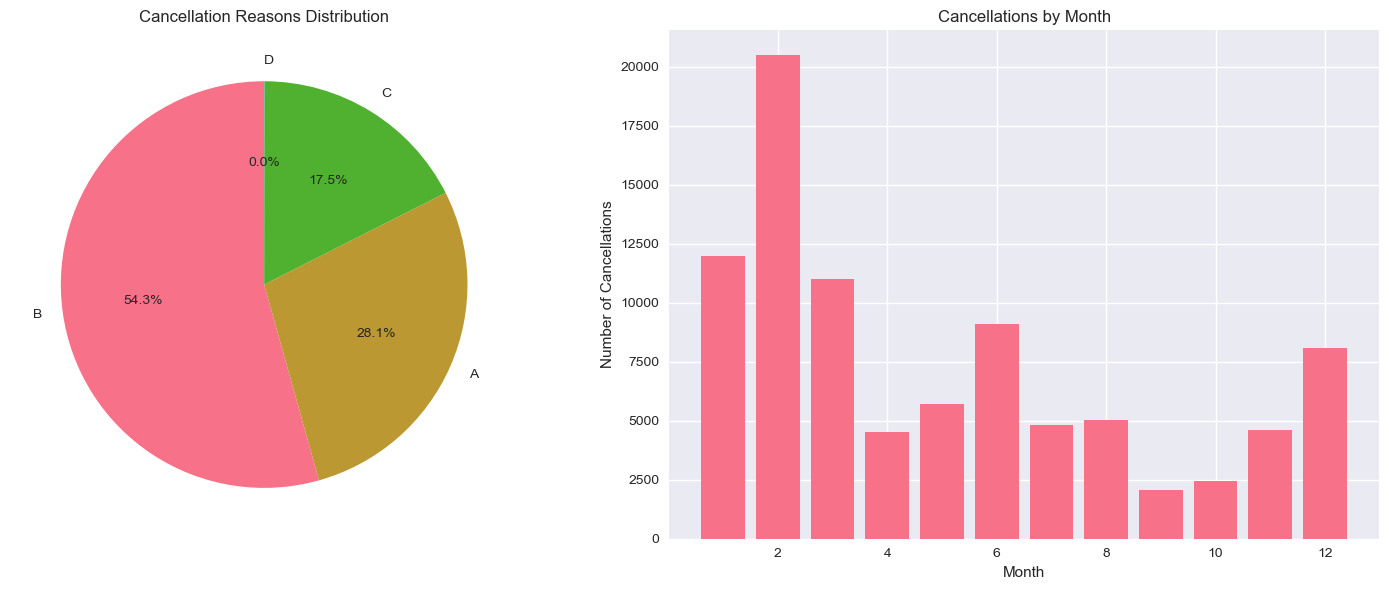

In [22]:
cancelled_flights_df = df[df['CANCELLED'] == 1]

if len(cancelled_flights_df) > 0:
    print(f"❌ Total Cancelled Flights: {len(cancelled_flights_df):,}")
    
    # Cancellation reasons
    cancellation_reasons = cancelled_flights_df['CANCELLATION_REASON'].value_counts()
    print("\n📋 Cancellation Reasons:")
    print(cancellation_reasons)
    
    # Cancellation by airline
    airline_cancellations = cancelled_flights_df.groupby('AIRLINE').size().sort_values(ascending=False)
    print("\n🏢 Top 10 Airlines by Cancellations:")
    print(airline_cancellations.head(10))
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Cancellation reasons pie chart
    if not cancellation_reasons.empty:
        axes[0].pie(cancellation_reasons.values, labels=cancellation_reasons.index, 
                   autopct='%1.1f%%', startangle=90)
        axes[0].set_title('Cancellation Reasons Distribution')
    
    # Monthly cancellations
    monthly_cancellations = cancelled_flights_df.groupby('MONTH').size()
    axes[1].bar(monthly_cancellations.index, monthly_cancellations.values)
    axes[1].set_title('Cancellations by Month')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Number of Cancellations')
    
    plt.tight_layout()
    plt.show()

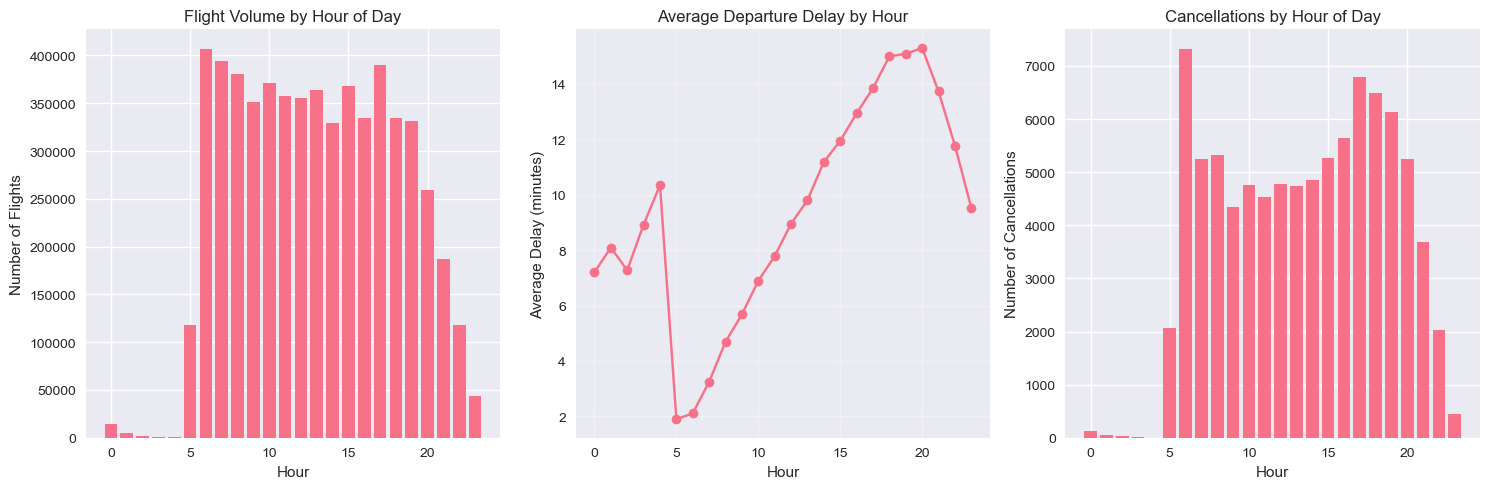

In [23]:
#Hour of day analysis (from scheduled departure)
df['DEPARTURE_HOUR'] = (df['SCHEDULED_DEPARTURE'] // 100).astype(int)
hourly_patterns = df.groupby('DEPARTURE_HOUR').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'CANCELLED': 'sum'
}).round(2)

hourly_patterns.columns = ['Flight_Count', 'Avg_Delay', 'Cancellations']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(hourly_patterns.index, hourly_patterns['Flight_Count'])
plt.title('Flight Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')

plt.subplot(1, 3, 2)
plt.plot(hourly_patterns.index, hourly_patterns['Avg_Delay'], marker='o')
plt.title('Average Departure Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(hourly_patterns.index, hourly_patterns['Cancellations'])
plt.title('Cancellations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Cancellations')

plt.tight_layout()
plt.show()

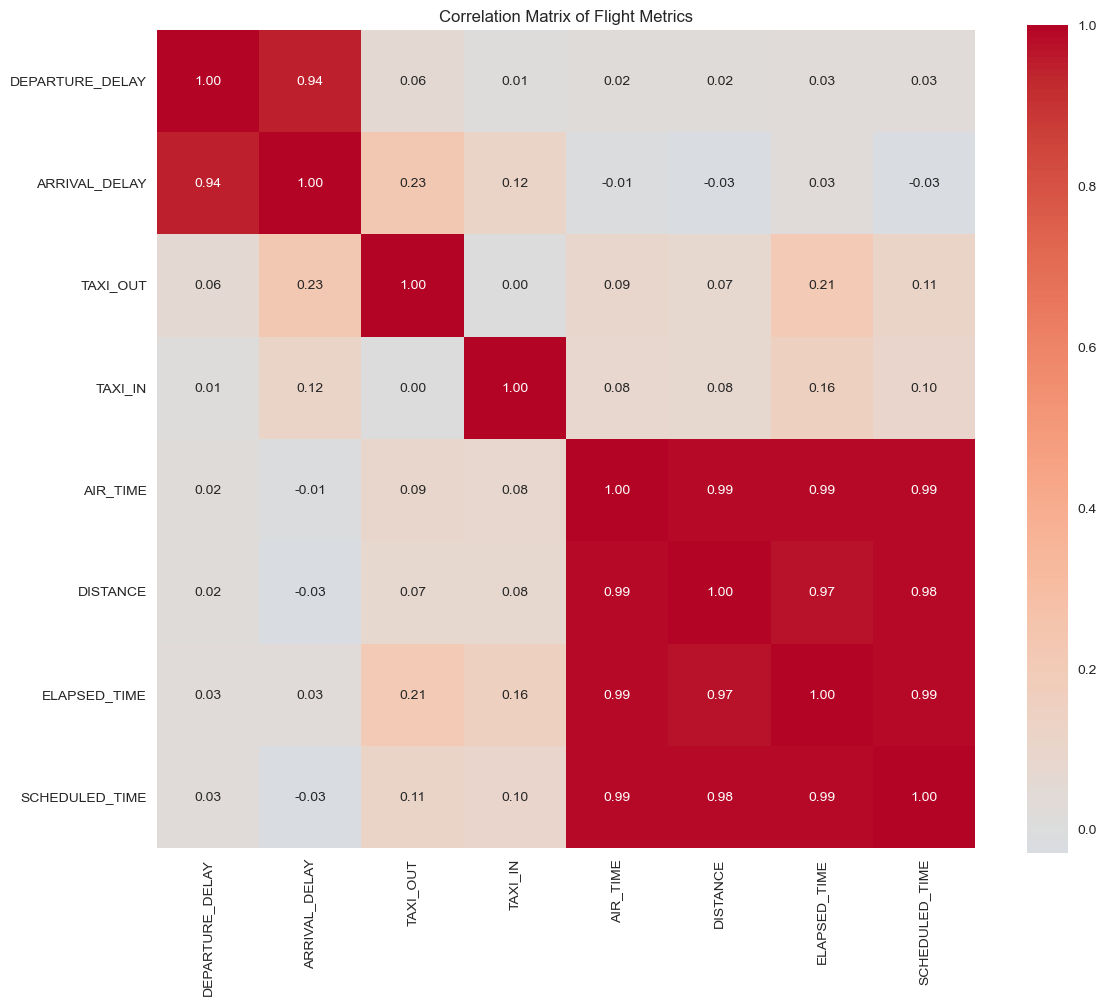

In [24]:
# Select numeric columns for correlation
numeric_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 
                'AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME']

correlation_matrix = active_flights[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Flight Metrics')
plt.tight_layout()
plt.show()

In [25]:
# Calculate key metrics
avg_departure_delay = active_flights['DEPARTURE_DELAY'].mean()
avg_arrival_delay = active_flights['ARRIVAL_DELAY'].mean()
cancellation_rate = (cancelled_flights / total_flights) * 100
busiest_month = monthly_flights.loc[monthly_flights['Flight_Count'].idxmax(), 'Month_Name']
worst_delay_airline = airline_stats.loc[airline_stats['Avg_Departure_Delay'].idxmax()].name

print(f"✈️  Average departure delay: {avg_departure_delay:.1f} minutes")
print(f"✈️  Average arrival delay: {avg_arrival_delay:.1f} minutes")
print(f"❌ Overall cancellation rate: {cancellation_rate:.2f}%")
print(f"📅 Busiest month: {busiest_month}")
print(f"🏢 Airline with highest avg delay: {worst_delay_airline}")


✈️  Average departure delay: 9.3 minutes
✈️  Average arrival delay: 4.4 minutes
❌ Overall cancellation rate: 1.54%
📅 Busiest month: Jul
🏢 Airline with highest avg delay: NK


In [ ]:
# Logistic Regression classifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns, matplotlib.pyplot as plt
import pandas as pd

# Use only active flights (not cancelled/diverted)
active_flights = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()

# Target: delayed if ARRIVAL_DELAY > 15
active_flights["DELAYED_15"] = (active_flights["ARRIVAL_DELAY"] > 15).astype(int)
print("Target distribution:")
print(active_flights["DELAYED_15"].value_counts(normalize=True))

# Same features 
features = [
    "MONTH", "DAY", "DAY_OF_WEEK",
    "AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT",
    "SCHEDULED_DEPARTURE", "DISTANCE"
]
X = active_flights[features].copy()
y = active_flights["DELAYED_15"].astype(int)

# Label-encode categoricals
cat_cols = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']
le_dict = {}
for c in cat_cols:
    X[c] = X[c].astype(str)
    le = LabelEncoder()
    X[c] = le.fit_transform(X[c])
    le_dict[c] = le

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Train Logistic Regression (balanced for class imbalance)
logreg_model = LogisticRegression(
    solver='saga', penalty='l2', C=1.0,
    class_weight='balanced', max_iter=2000, n_jobs=-1
)
logreg_model.fit(X_train, y_train)

# Evaluate
y_pred  = logreg_model.predict(X_test)
y_proba = logreg_model.predict_proba(X_test)[:,1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

RocCurveDisplay.from_estimator(logreg_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression"); plt.show()


Target distribution:
DELAYED_15
0    0.820879
1    0.179121
Name: proportion, dtype: float64


In [ ]:
# --- Helpers using Logistic Regression ---
import datetime

def preprocess_input(flight_date, airline, origin, destination, sched_departure, desired_arrival, le_dict, model, df):
    date_obj = datetime.datetime.strptime(flight_date, "%Y-%m-%d")
    month, day, day_of_week = date_obj.month, date_obj.day, date_obj.isoweekday()

    # distance lookup (route mean fallback)
    subset = df[(df["ORIGIN_AIRPORT"]==origin) & (df["DESTINATION_AIRPORT"]==destination)]
    distance = int(subset["DISTANCE"].mean()) if len(subset) else int(df["DISTANCE"].mean())

    input_df = pd.DataFrame([{
        "MONTH": month,
        "DAY": day,
        "DAY_OF_WEEK": day_of_week,
        "AIRLINE": airline,
        "ORIGIN_AIRPORT": origin,
        "DESTINATION_AIRPORT": destination,
        "SCHEDULED_DEPARTURE": sched_departure,
        "DISTANCE": distance
    }])

    for col in ["AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]:
        input_df[col] = input_df[col].astype(str)
        le = le_dict[col]
        input_df[col] = le.transform(input_df[col]) if input_df[col].iloc[0] in le.classes_ else 0

    # delay probability
    prob_delay = float(model.predict_proba(input_df)[:,1][0])

    # simple on-time heuristic vs desired_arrival
    est_flight_time = distance / 500 * 60  # minutes (≈500 mph)
    sched_arrival_minutes = (sched_departure//100)*60 + (sched_departure%100) + est_flight_time
    hh, mm = map(int, desired_arrival.split(":"))
    desired_arrival_minutes = hh*60 + mm
    prob_on_time = 1 - prob_delay if sched_arrival_minutes <= desired_arrival_minutes else 0.2

    return prob_delay, prob_on_time


def suggest_alternatives(user_input, df, le_dict, model, k=5, pool=50):
    origin, dest, date_str = user_input["origin"], user_input["destination"], user_input["date"]
    candidates = df[(df["ORIGIN_AIRPORT"]==origin) & (df["DESTINATION_AIRPORT"]==dest)]
    if len(candidates) > pool:
        candidates = candidates.sample(pool, random_state=42)

    results = []
    for _, row in candidates.iterrows():
        prob_delay, _ = preprocess_input(
            flight_date=date_str,
            airline=row["AIRLINE"],
            origin=row["ORIGIN_AIRPORT"],
            destination=row["DESTINATION_AIRPORT"],
            sched_departure=int(row["SCHEDULED_DEPARTURE"]),
            desired_arrival="23:59",
            le_dict=le_dict,
            model=model,
            df=df
        )
        results.append((row["AIRLINE"], int(row["SCHEDULED_DEPARTURE"]), prob_delay))

    return sorted(results, key=lambda x: x[2])[:k]


In [ ]:
user_input = {
    "date": "2015-06-15",
    "airline": "AA",
    "origin": "ATL",
    "destination": "LAX",
    "sched_departure": 1330,
    "desired_arrival": "18:00"
}

prob_delay, prob_on_time = preprocess_input(
    flight_date=user_input["date"],
    airline=user_input["airline"],
    origin=user_input["origin"],
    destination=user_input["destination"],
    sched_departure=user_input["sched_departure"],
    desired_arrival=user_input["desired_arrival"],
    le_dict=le_dict,
    model=logreg_model,  # <--- swap here
    df=df
)
print(f"✈️ Probability of Delay: {prob_delay:.2f}")
print(f"⏱ Probability of arriving by {user_input['desired_arrival']}: {prob_on_time:.2f}")

alts = suggest_alternatives(user_input, df, le_dict, logreg_model)
print("\n✅ Alternative Flights (Airline, Departure, Prob Delay):")
for alt in alts:
    print(alt)


In [ ]:
# Historical expected delay (minutes) 
active_hist = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
active_hist['ARR_DELAY_POS'] = active_hist['ARRIVAL_DELAY'].fillna(0).clip(lower=0)
active_hist['DEP_HOUR'] = (active_hist['SCHEDULED_DEPARTURE'] // 100).clip(0, 23)

group_specs = [
    ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "DEP_HOUR"],
    ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "DEP_HOUR"],
    ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"],
    ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"],
    ["AIRLINE"],
]

avg_maps = []
for keys in group_specs:
    avg_maps.append((keys, active_hist.groupby(keys)["ARR_DELAY_POS"].mean()))

global_avg_delay = float(active_hist["ARR_DELAY_POS"].mean())

def expected_delay_minutes(airline, origin, destination, sched_departure):
    dep_hour = int(sched_departure) // 100
    row = {
        "AIRLINE": str(airline),
        "ORIGIN_AIRPORT": str(origin),
        "DESTINATION_AIRPORT": str(destination),
        "DEP_HOUR": dep_hour
    }
    for keys, series_map in avg_maps:
        try:
            key = tuple(row[k] for k in keys)
            return float(series_map.loc[key])
        except KeyError:
            continue
    return global_avg_delay


In [ ]:
# After probability & alternatives, also show historical expected delay
exp_delay_min = expected_delay_minutes(
    airline=user_input["airline"],
    origin=user_input["origin"],
    destination=user_input["destination"],
    sched_departure=user_input["sched_departure"]
)

print(f"🕒 Expected Delay (historical average): {exp_delay_min:.1f} minutes")
